In [1]:
from models.mtcnn import Mtcnn

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [2]:
MODEL_PATH = "saved/mtcnn-20200118.pth"

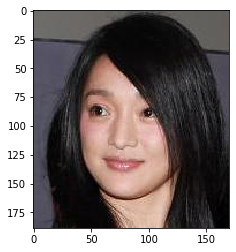

In [3]:
test_img = plt.imread("182646.jpg")
plt.imshow(test_img)
plt.show()

In [4]:
test_img = test_img.astype(np.float32)
test_img = (test_img - 128) / 256

print(np.max(test_img), np.min(test_img))

0.49609375 -0.5


In [5]:
model = Mtcnn()
model.load(MODEL_PATH)

MTCNN was loaded.


In [6]:
o_face_preds, o_bbox_preds, o_lm_preds, cache = model(test_img)

In [7]:
o_face_preds.shape

torch.Size([8, 2])

In [8]:
preds = model.get_coord_transformed(o_face_preds, o_bbox_preds, o_lm_preds, cache)

In [9]:
preds

[[24, 44, 85, 85, [50, 74, 77, 74, 62, 97, 52, 105, 76, 105]],
 [28, 79, 94, 95, [83, 135, 94, 120, 94, 154, 90, 171, 94, 169]],
 [22, 49, 120, 120, [58, 89, 99, 88, 78, 116, 62, 134, 100, 133]],
 [30, 70, 86, 86, [64, 93, 96, 92, 78, 112, 65, 124, 94, 124]],
 [30, 34, 113, 113, [42, 83, 78, 83, 60, 107, 44, 127, 74, 127]],
 [55, 72, 113, 113, [57, 92, 91, 91, 72, 117, 58, 137, 89, 136]],
 [33, 44, 65, 65, [65, 93, 67, 94, 66, 94, 66, 95, 67, 95]]]

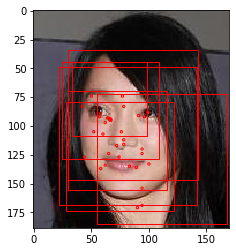

In [10]:
ax = plt.subplot(1, 1, 1)
ax.imshow((test_img*256 + 128).astype(np.uint8))

for bbox_x, bbox_y, bbox_w, bbox_h, landmark in preds:
    p = patches.Rectangle((bbox_x, bbox_y), bbox_w, bbox_h, facecolor="none", edgecolor="red")
    ax.add_patch(p)
    
    for i in range(0, 10, 2):
        lm_x, lm_y = landmark[i], landmark[i+1]
        p = patches.Circle((lm_x, lm_y), radius=1, facecolor="none", edgecolor="red")
        ax.add_patch(p)
    
plt.show()